# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

Cгенерируем кончную совокупность с 2 значениями 0 и 1, размера 100000 с помощью функции randid библиотеки numpy
Cгенерируем подвыборку размером 1000, по ней будем оченивать долю успехов(click through rate for banners)

In [4]:
#истинное значение доли
statistical_population.mean() #оценить среднее по генеральной совокупности

0.49770999999999999

## Точечная оценка доли

In [5]:
random_sample.mean() # оценку истинного значения доли по нашей выборке. Лучшая оценка среднего – это выборочная средняя, вляется несмещенной, асимптотически нормальной, эффективной

0.502

Видим, что мы получили 0,502 — в общем, это очень хорошее продвижение. Однако часто такой оценки недостаточно. Например, в тех случаях, когда мы хотим знать, в каких диапазонах меняется настоящая доля, то есть какое минимальное и максимальное значение на нашу оценку среднего. Вот для того чтобы такую оценку получить, нужно построить доверительный интервал на среднее. Для того чтобы такой интервал получить, мы с вами будем использовать библиотеку Statsmodels

## Доверительный интервал для доли

In [6]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

Чаще всего доверительные интервалы строятся на основе нормального распределения с использованием центральной предельной теоремы. Формула прямо перед вами. Давайте и мы начнем с этого. Для того чтобы такие интервалы получить, мы будем использовать функцию proportion confint. Она принимает несколько аргументов. Первый аргумент — это количество успехов в нашей подвыборке. Второй аргумент — это количество событий, то есть размер нашей подвыборки. И метод, с помощью которого мы хотим это оценивать. Мы работаем с нормальным распределением, поэтому и пишем метод normal. 
Ширина интервала-чем уже, тем выше точность оценки диапазона. Наше настоящее среднее 0,498,в этот интервал попадает. Ширина интервала 0,06 — довольно узкий интервал.

In [7]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [9]:
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [16]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

А теперь давайте попробуем эту оценку улучшить. Следующий метод, который очень часто используют, это доверительный интервал Уилсона. Это некоторое улучшение предыдущего метода, которое позволяет получать качественные оценки в крайних случаях. То есть тогда, когда наша доля очень близка к 0 или очень близка к 1. Более того, этот интервал получается неплохим в случае, когда наша случайная подвыборка довольно мала, то есть включает в себя очень мало событий. Формула для расчета перед вами и давайте строить интервал. Это делается с помощью той же самой функции, видите, что первые два параметра не меняются. Однако нам нужно изменить метод, с помощью которого мы будем строить интервал. В данном случае мы будем пользоваться методом Уилсона, поэтому давайте это явно напишем. Итак, получаем интервал. Теперь давайте выведем результаты на экран. И сравним с предыдущим. Видим, что наши границы практически не изменились, видим, что изменения у нас только в пятом знаке после запятой, ну и с данной точностью мы даже не можем увидеть разницу в ширине интервала, то есть фактически они одинаковые. Ну почему так получается? Здесь мы не видим явных преимуществ, потому что наша случайная подвыборка довольно хороша. Значение доли у нас не является крайним. Объектов целых событий, вернее целых 1000. Поэтому, в общем-то, мы и так можем довольно не плохо это оценить. Теперь давайте посмотрим еще раз на ширину интервала. В данном случае наш интервал имеет ширину 0,6. Часто мы с вами можем хотеть задать некоторое ограничение на ширину интервала. Например, мы хотим знать более точную оценку и получить интервал меньшей ширины. Таким образом, возникает вопрос: сколько же событий нам нужно знать для того, чтобы оценить долю с достаточной точностью? 

In [17]:
print ('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [10]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [11]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

сколько же событий нам нужно знать для того, чтобы оценить долю с достаточной точностью? Для того чтобы этот вопрос решить, существует очень удобный метод под названием sample size confint proportion. Он позволяет нам явно задать ограничение на ширину нашего интервала и получить количество событий, которое необходимо для того, чтобы получить оценку заданной ширины. Вот давайте это сделаем. Сначала импортируем нужную функциональность. И вот давайте для разнообразия получим интервал в 3 раза у́же, то есть интервал ширины 0,02. Для этого сначала указываем среднее выборочное по нашей выборке и давайте теперь укажем ширину интервала. На самом деле нам нужно указать половину ширины этого интервала для того, чтобы в дальнейшем получить интервал заданной ширины. Вот давайте получим количество объектов n samples и сразу же на него посмотрим. Вот оказывается, что чтобы получить оценку заданной точности, то есть в 3 раза, чтобы получить ширину в 3 раза у́же, нам нужно взять почти в 10 раз больше событий. 

In [19]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples) # кол-во объектов расчитаное шагом выше

In [20]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [21]:
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


Интервал по-прежнему достаточно хороший. Наше истинное значение входит в заданный интервал и при этом он стал в 3 раза у́же. Мы получили оценку интервала шириной 0,002. Н

Quiz 2
Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [22]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(1, 50, method = 'normal')

(-0.018805307081790987, 0.058805307081790992)

3. 
В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [23]:
proportion_confint(1, 50, method = 'wilson')

(0.0035392592716462362, 0.10495443589637815)

4. 
Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от 0 до 1?
wilson

5. 
Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [45]:
from statsmodels.stats.proportion import samplesize_confint_proportion
#statsmodels.stats.proportion.samplesize_confint_proportion(proportion, half_length, alpha=0.05, method='normal')[source]
#find sample size to get desired confidence interval length

n_samples = np.ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))
n_samples

753.0

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

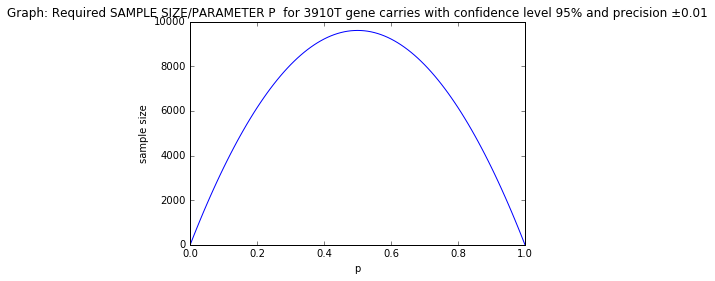

In [38]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def sample_size(p):
    return int(np.ceil(samplesize_confint_proportion(p, 0.01, method='normal')))

p_s = np.arange(0, 1.01, 0.01)
sample_sizes = [sample_size(p) for p in p_s]
plt.plot(ps, sizes)

plt.xlabel('p')
plt.ylabel('sample size')
plt.title('Graph: Required SAMPLE SIZE/PARAMETER P  for 3910T gene carries with confidence level 95% and precision ±0.01')

plt.show()

In [44]:
p_s[np.argmax(sample_sizes)]
print(np.argmax(sample_sizes))
np.max(sample_sizes)

50


9604

In [50]:
np.ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604.0

# Quiz

1. 
Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины X∼N(μ,σ2) лежит в интервале μ±c⋅σ. Чему равно точное значение константы c? Округлите ответ до четырёх знаков после десятичной точки.

stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [52]:
import scipy.stats  as stats
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

In [55]:
from scipy.stats import norm
# Methods: ppf(q, loc=0, scale=1)	Percent point function (inverse of cdf — percentiles).
norm.ppf(.9985) #99.7%+(0.3/2)

2.9677379253417944

Task 5. В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.
За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.
Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [109]:
import scipy
import numpy as np

sample1=11037
inf1=104
sample2=11034
inf2=189

In [110]:
abs(inf1/sample1-inf2/sample2) #Task 5 ,see formula below

0.0077060239760047815

In [111]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [119]:
data_test = np.zeros(sample1) #векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все ну
data_control = np.zeros(sample2)
data_test[:inf1]=1
data_control[:inf2]=1


In [120]:
print ("confidence interval: [%f, %f]" % proportions_confint_diff_ind(data_control, data_test))

confidence interval: [0.004688, 0.010724]


$X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  $$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$

$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$

Task7 Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину p1−p, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо p нужно подставить p^. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как
$\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174$

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

Enter answer here


In [79]:
odds1=p1/(1-p1)
odds2=p2/(1-p2)
odds2/odds1

1.8320539419087138

Task 8. 
Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
установите random seed=0;
сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [121]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [122]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [123]:
np.random.seed(0)

In [145]:
data_test_pseudo = get_bootstrap_samples(data1, 1000) # для каждых данных генерируем псевдостатистики
data_control_pseudo = get_bootstrap_samples(data2, 1000)

In [146]:
print(data_test_pseudo)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [137]:
print(data_test_pseudo.shape)
print(data_test_pseudo[2])

(1000, 11037)
[ 0.  0.  0. ...,  0.  0.  0.]


In [158]:
check1=list(map(lambda x: sum(x)/(len(x) - sum(x)), data_test_pseudo))
print(len(check1))
print (check1)

1000
[0.010529207104925838, 0.009604829857299671, 0.0088665447897623394, 0.008958771368498035, 0.0092355523043160213, 0.0079452054794520548, 0.010621737936086438, 0.0091432751211483962, 0.008589966188430961, 0.0092355523043160213, 0.010899432130426817, 0.010714285714285714, 0.010714285714285714, 0.010251716247139588, 0.011269928532160528, 0.0098819654131210542, 0.0090510148107515089, 0.0099743777452415815, 0.0091432751211483962, 0.0097895699908508698, 0.010529207104925838, 0.0078531640946032325, 0.0076691317447274716, 0.009327846364883402, 0.0091432751211483962, 0.0096971914737901382, 0.0091432751211483962, 0.0094201573074812507, 0.00849780701754386, 0.0096971914737901382, 0.0082214305289120305, 0.0084056646870717226, 0.008774335069920482, 0.011177278973889144, 0.010344196265104357, 0.0097895699908508698, 0.010159253157605712, 0.009512485136741973, 0.010159253157605712, 0.00849780701754386, 0.0098819654131210542, 0.0096971914737901382, 0.008958771368498035, 0.0084056646870717226, 0.010

In [ ]:
check2=list(map(lambda x: sum(x)/(len(x) - sum(x)), data_test_pseudo))

In [ ]:
odds_scores = list(map(np.median, get_bootstrap_samples(data1, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(data2, 1000)))

In [155]:
odd_scores = zip((map(lambda x: sum(x)/(len(x) - sum(x)), data_test_pseudo)), \
                 (map(lambda x: sum(x)/(len(x) - sum(x)), data_control_pseudo)))

In [156]:
print (type(odd_scores))

<class 'zip'>


In [157]:
print ("95% confidence interval for the data1 median repair time:",  stat_intervals(odd_scores, 0.05))

TypeError: unsupported operand type(s) for *: 'zip' and 'float'